## MOwNiT - Labolatorium 4 projekt - Dominik Jędraszek

### Automaty komórkowe - modelowanie epidemii

Do generacji danych posłużę się własnym programem, który znajduje się na stronie ` https://github.com/xDominix/JavaLabsRepo.git `. Przedstawia on symulację, która dla różnych parametrów początkowych, pokazuje rozwój epidemii na niewielkiej, kwadratowej planszy.

### Rodzaj epidemii

- Wirus ten jest największym zagrożeniem dla młodego pokolenia, które jest najmniej odporne,
- Lekarstwa to jedyna nadzieja, by przeżyć, podtrzymują przy życiu przez określony czas, dopóki wirus nie wewoluuje,
- Nadal nie wynaleziono stabilnej szczepionki, która byłaby w stanie przeciwdziałać permanentnie wirusowi.

### Przykładowe wywołanie programu

![SegmentLocal](lab4_proj_data/ss.gif "segment")

LEGENDA
- Duże kropki - kolor:
    - czerwony -> miasta, w których nie odkryto jeszcze lekarstw, podtrzymujących życie
    - zielony -> miasta, w których odkryto lekarstwo
    - ciemno-zielony -> miasta wysoko rozwinięte, w których odkryto lekarstwo (specjalna strefa na takie miasta)
- Małe kropki - kolor:
    - czerwony -> populacja zdrowa
    - brązowy -> populacja zainfekowana
    - czarny -> populacja na skraju wyczerpania

### Wykresy zmian populacji z czasie dla różnych parametrów programu

Kolumny plików .csv

- DAY NO. - numer dnia
- POPULATION - populacja (w tysiącach)
- MEDCITIES - liczba miast, w których wynaleziono lekarstwa,
- AVERAGE RESISTANCE - średnia odporność populacji (w latach)
- AVERAGE LIFE TIME - średnia długość życia populacji (w latach)
- AVERAGE CHILDS - średnia ilość potomstwa (w tysiącach)

#### Minimalna ilość populacji na start + słabe działanie leków

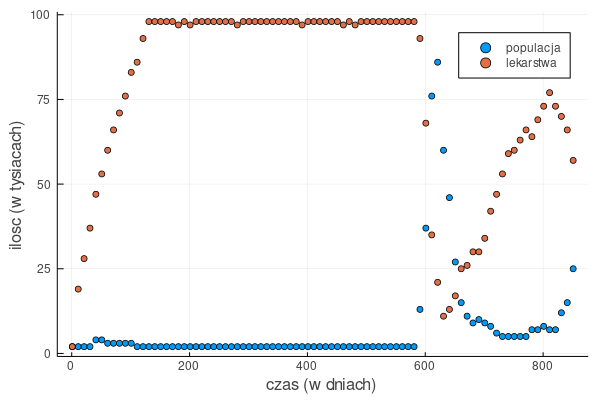

In [1]:
#import Pkg; Pkg.add("CSV")
using CSV
using DataFrames
using Plots

df = CSV.read("lab4_proj_data/2population.csv", DataFrame)

ys= map(x->parse(Int, split(split(x,['.'])[2],[' '])[2]),df[!,1])
scatter([1:10:length(ys)],ys[begin:10:end], fmt = :png,label="populacja",xlabel="czas (w dniach)",ylabel="ilosc (w tysiacach)")
ys2= map(x->parse(Int, split(x,[' '])[2]),df[!,2])
scatter!([1:10:length(ys2)],ys2[begin:10:end],label="lekarstwa", fmt = :png)

- Przez długi czas populacja się nie rozwija, gdyż szuka się po mapie.
- Lekarstw w tym czasie jest pod dostatkiem (dla tak niewielkiej populacji)
- Gdy populacja zaczyna się rozmnażać (dzień ok. 600), cieżko jest nadążyć z produkcją lekarstw i zauważyć można gwałtowny spadek ilości lekarstw na planszy.

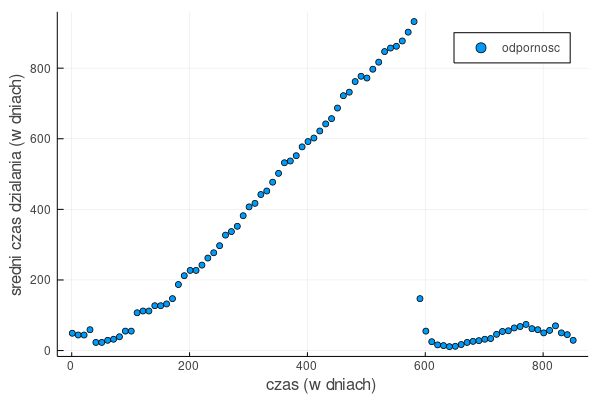

In [2]:
ys2= map(x->parse(Int, split(x,[' '])[2]),df[!,3])
scatter([1:10:length(ys2)],ys2[begin:10:end],label="odpornosc",xlabel="czas (w dniach)",ylabel="sredni czas dzialania (w dniach)", fmt = :png)

Z powyższego wykresu można wyczytać, że populacja zyskuje na odporności do pewnego momentu. Po 600 dniu, populacja zaczyna się rozmnażać i widzimy wtedy gwałtowny spadek odporności (najmlodsi zaczynaja od słabej odporności)

#### Podwyższona skuteczność lekarstw

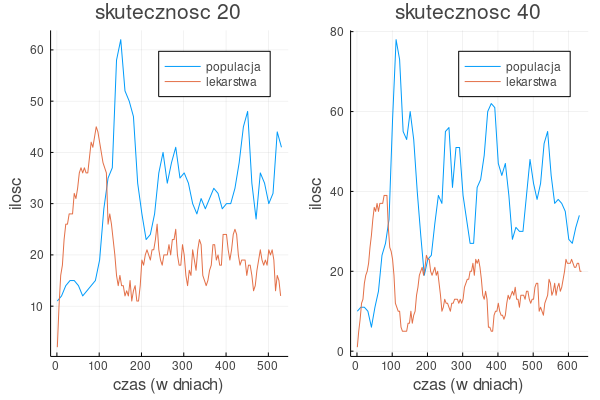

In [17]:
#import Pkg; Pkg.add("CSV")
using CSV
using DataFrames
using Plots

df = CSV.read("lab4_proj_data/20resistance.csv", DataFrame)
ys= map(x->parse(Int, split(split(x,['.'])[2],[' '])[2]),df[!,1])
p1 = plot([1:10:length(ys)],ys[begin:10:end], fmt = :png,label="populacja",xlabel="czas (w dniach)",ylabel="ilosc",title="skutecznosc 20")
ys2= map(x->parse(Int, split(x,[' '])[2]),df[!,2])
plot!([1:4:length(ys2)],ys2[begin:4:end],label="lekarstwa")

df = CSV.read("lab4_proj_data/40resistance.csv", DataFrame)
ys= map(x->parse(Int, split(split(x,['.'])[2],[' '])[2]),df[!,1])
p2 = plot([1:10:length(ys)],ys[begin:10:end], fmt = :png,label="populacja",xlabel="czas (w dniach)",ylabel="ilosc",title="skutecznosc 40")
ys2= map(x->parse(Int, split(x,[' '])[2]),df[!,2])
plot!([1:4:length(ys2)],ys2[begin:4:end],label="lekarstwa")
plot(p1,p2, layout=2)

Dla takich ustawień, wykresy wyglądają podobnie, jednak zakres y jest większy, co oznacza, że dla większej skuteczności populacja jest większa.

Wykresy populacji do lekarstw są względem siebie symetryczne (kiedy populacja jest niewielka, lekarstw jest dużo i na odwrót). Wynika z tego, że istnieje relacja pomiędzy tymi zmiennymi.

#### Zbalansowane parametry programu (wielkość planszy,skuteczność leków, ilość populacji na start)

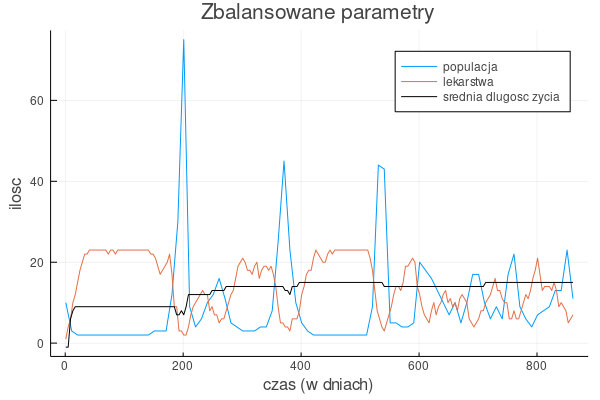

In [15]:
#import Pkg; Pkg.add("CSV")
using CSV
using DataFrames
using Plots

df = CSV.read("lab4_proj_data/custom.csv", DataFrame)
ys= map(x->parse(Int, split(split(x,['.'])[2],[' '])[2]),df[!,1])
p1 = plot([1:10:length(ys)],ys[begin:10:end], fmt = :png,label="populacja",xlabel="czas (w dniach)",ylabel="ilosc",title="Zbalansowane parametry")
ys2= map(x->parse(Int, split(x,[' '])[2]),df[!,2])
plot!([1:4:length(ys2)],ys2[begin:4:end],label="lekarstwa")
ys2= map(x->parse(Int, split(x,[' '])[2]),df[!,4])
plot!([1:4:length(ys2)],ys2[begin:4:end],label="srednia dlugosc zycia",fmt=:png,color="black")

- Widzimy wtedy ze srednia dlugosc zycia jednostek populacji jest niemalze stala.
- Dla jednej jednostki przypada jedno lekarstwo (srednio).
- Z czasem obie funkcje zaczynają się 'zbilżać do siebie', nie widzimy skoków na zmianę (jak na początku)